In [1]:
from Engine import Engine
from Environment import Environment

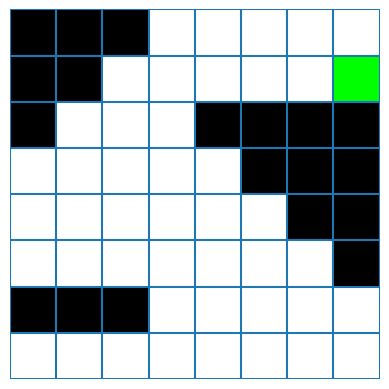

In [2]:
size = (8,8)
goal_reward  = 1000
fail_penalty = -100
time_penalty = -1
outOfBoundsList = [(x,1) for x in range(3)]
for i in range(4):
    outOfBoundsList += [(x,5-i) for x in range(4+i,8)]
for i in range(3):
    outOfBoundsList += [(x,7-i) for x in range(3-i)]
goalList = [(7,6)]

env = Environment(size,goal_reward,fail_penalty,time_penalty,outOfBoundsList,goalList)
engine = Engine(env)

env.display()

In [3]:
engine.train(15,gamma = .99)

Iteration:0, Avg Q-val:-82.41242811414931
Iteration:1, Avg Q-val:-92.06546522352431
Iteration:2, Avg Q-val:-91.11197872450086
Iteration:3, Avg Q-val:-86.8487853995497
Iteration:4, Avg Q-val:-80.30053628453321
Iteration:5, Avg Q-val:-71.29995746258095
Iteration:6, Avg Q-val:-62.41879291387524
Iteration:7, Avg Q-val:-53.75050174150081
Iteration:8, Avg Q-val:-48.862337817166456
Iteration:9, Avg Q-val:-45.07244558413678
Iteration:10, Avg Q-val:-43.74788795035314
Iteration:11, Avg Q-val:-43.52929950937201
Iteration:12, Avg Q-val:-43.52929950937201
Iteration:13, Avg Q-val:-43.52929950937201
Iteration:14, Avg Q-val:-43.52929950937201


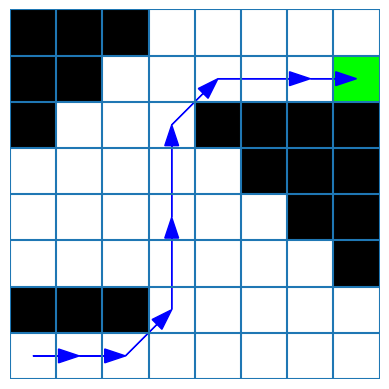

In [4]:
engine.display_run((0,0,0,0))